**Read and Preprocess Data**

In [44]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np


# Load the data
file_path = '/content/forestfires.csv'
data = pd.read_csv(file_path)

# Check the dataset
data.head()

# Encode categorical variables
data_encoded = data.copy()
label_encoders = {}
for col in ['month', 'day']:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    label_encoders[col] = le

# Normalize numerical features
scaler = StandardScaler()
numerical_features = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
data_encoded[numerical_features] = scaler.fit_transform(data_encoded[numerical_features])

# Check the preprocessed data
data_encoded.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,1.008313,0.569860,7,0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202
1,1.008313,-0.244001,10,5,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202
2,1.008313,-0.244001,10,2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202
3,1.440925,1.383722,7,0,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202
4,1.440925,1.383722,7,3,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202


**Dimensionality Reduction using PCA**

In [45]:
# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
data_pca = pca.fit_transform(data_encoded)

# Check the number of components retained
pca.n_components_

9

**K-Means Clustering Algorithm**

In [46]:
def plot_elbow_method(data, range_k):
    #Plots the Elbow Method and returns the optimal number of clusters.
    inertia = []
    for k in range_k:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(data)
        inertia.append(kmeans.inertia_)

    # Plot the elbow method
    plt.figure(figsize=(8, 5))
    plt.plot(range_k, inertia, marker='o')
    plt.title("Elbow Method")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Inertia (WCSS)")
    plt.show()

    # Find optimal k using the elbow point
    optimal_k = range_k[max(range(len(inertia) - 1), key=lambda i: inertia[i] - inertia[i + 1])]
    print(f"Optimal number of clusters (k) based on the elbow method: {optimal_k}")
    return optimal_k

def apply_kmeans(data, optimal_k):
    #Applies K-means clustering and calculates the silhouette score.
    kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10).fit(data)
    sil_score = silhouette_score(data, kmeans.labels_)
    print(f"Silhouette score for K-Means: {sil_score}")
    return kmeans.labels_

**Gaussian Mixture Model Clustering Algorithm**

In [47]:
def apply_gmm(data, n_components):
    #Applies Gaussian Mixture Model and calculates the silhouette score.
    gmm = GaussianMixture(n_components=n_components, random_state=42).fit(data)
    labels = gmm.predict(data)
    sil_score = silhouette_score(data, labels)
    print(f"Silhouette score for GMM: {sil_score}")
    return labels


**DBSCAN Clustering Algorithm**

In [48]:
def apply_dbscan(data, target_clusters, eps_values, min_samples_values):
    #Tunes DBSCAN to find the best parameters for the desired number of clusters.
    best_eps = None
    best_min_samples = None
    best_sil_score = -1
    best_labels = None

    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(data)
            labels = dbscan.labels_

            # Count number of clusters (excluding noise points labeled as -1)
            num_clusters = len(set(labels)) - (1 if -1 in labels else 0)

            # Calculate Silhouette Score if at least 2 clusters exist
            if num_clusters > 1:
                sil_score = silhouette_score(data[labels != -1], labels[labels != -1])

                # Select based on matching target clusters or highest silhouette score
                if abs(num_clusters - target_clusters) < abs(best_sil_score - target_clusters) or sil_score > best_sil_score:
                    best_eps = eps
                    best_min_samples = min_samples
                    best_sil_score = sil_score
                    best_labels = labels

    return best_eps, best_min_samples, best_labels, best_sil_score

**Hierarchical Clustering Algorithm**

In [49]:
def apply_hierarchical(data, n_clusters, method='ward'):
    #Applies Hierarchical Clustering and calculates the silhouette score.
    linkage_matrix = linkage(data, method=method)
    plt.figure(figsize=(10, 6))
    dendrogram(linkage_matrix, truncate_mode="level", p=5)
    plt.title("Hierarchical Clustering Dendrogram (Truncated)")
    plt.xlabel("Sample Index")
    plt.ylabel("Distance")
    plt.show()

    labels = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')
    sil_score = silhouette_score(data, labels)
    print(f"Silhouette score for Hierarchical Clustering: {sil_score}")
    return labels

**t-SNE Visualization**

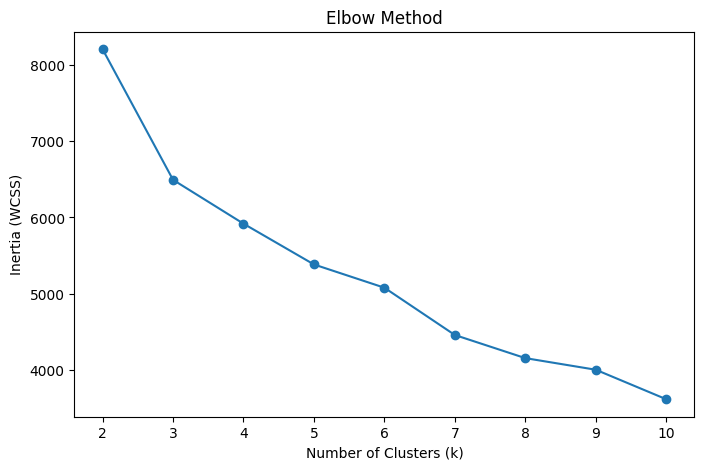

Optimal number of clusters (k) based on the elbow method: 2
Silhouette score for K-Means: 0.44782750784454317
Silhouette score for GMM: 0.44305504731436035


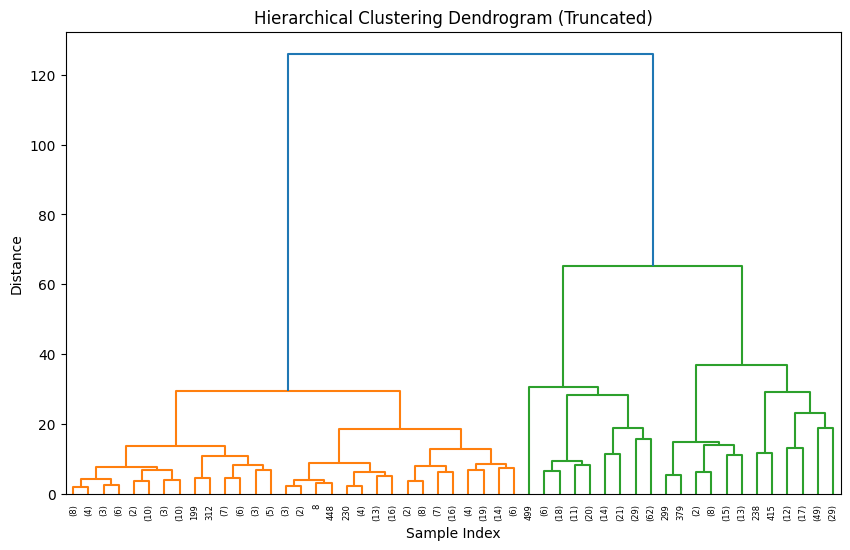

Silhouette score for Hierarchical Clustering: 0.4250882897245347
Silhouette score for DBSCAN: 0.4586155432584633


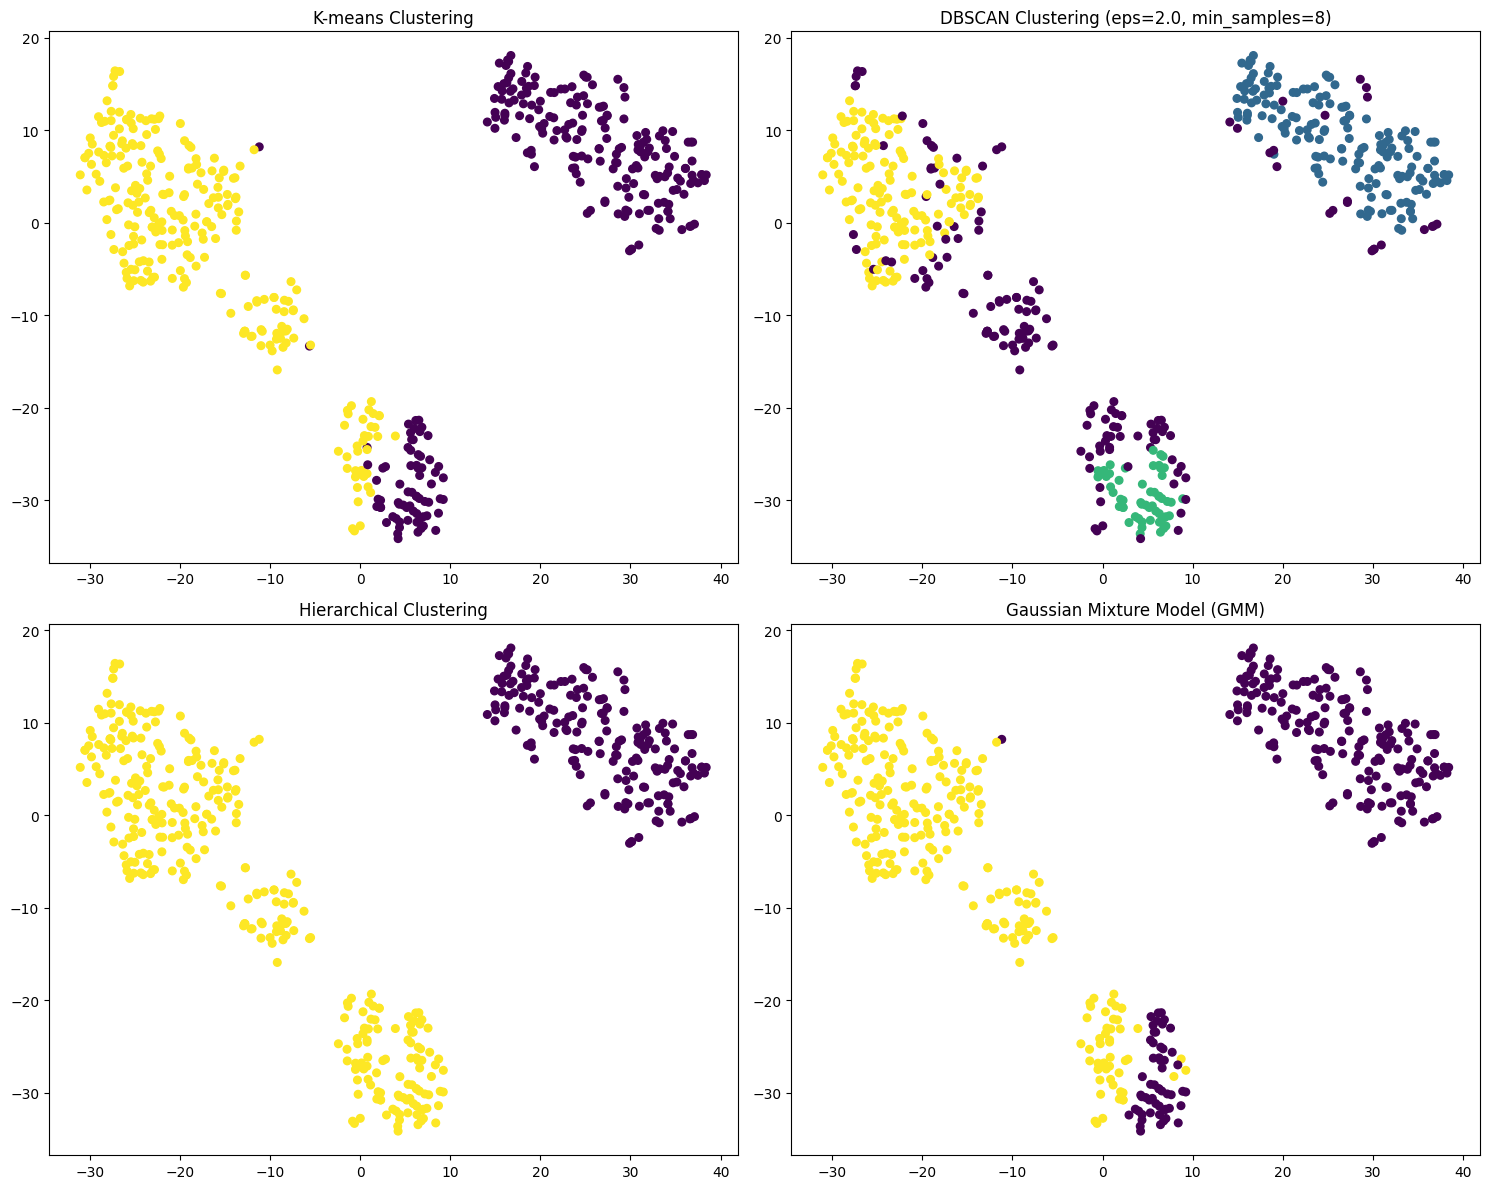

In [52]:
# Example
range_k = range(2, 11)
optimal_k = plot_elbow_method(data_pca, range_k)

# Apply each clustering method
kmeans_labels = apply_kmeans(data_pca, optimal_k)
gmm_labels = apply_gmm(data_pca, optimal_k)
hierarchical_labels = apply_hierarchical(data_pca, optimal_k)

# Grid search parameters for DBSCAN
eps_values = np.linspace(0.5, 2.0, 10)  # Test values for eps
min_samples_values = range(3, 10)       # Test values for min_samples
best_eps, best_min_samples, dbscan_labels, dbscan_sil_score = apply_dbscan(
    data_pca, target_clusters=optimal_k, eps_values=eps_values, min_samples_values=min_samples_values
)
print(f"Silhouette score for DBSCAN: {dbscan_sil_score}")

# Visualize results using t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate='auto', init='pca', random_state=42)
data_tsne = tsne.fit_transform(data_pca)

# Visualize the t-SNE results for different clustering methods
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# K-means clustering visualization
axs[0, 0].scatter(data_tsne[:, 0], data_tsne[:, 1], c=kmeans_labels, cmap='viridis', s=30)
axs[0, 0].set_title("K-means Clustering")

# DBSCAN clustering visualization
axs[0, 1].scatter(data_tsne[:, 0], data_tsne[:, 1], c=dbscan_labels, cmap='viridis', s=30)
axs[0, 1].set_title(f"DBSCAN Clustering (eps={best_eps}, min_samples={best_min_samples})")

# Hierarchical clustering visualization
axs[1, 0].scatter(data_tsne[:, 0], data_tsne[:, 1], c=hierarchical_labels, cmap='viridis', s=30)
axs[1, 0].set_title("Hierarchical Clustering")

# GMM clustering visualization
axs[1, 1].scatter(data_tsne[:, 0], data_tsne[:, 1], c=gmm_labels, cmap='viridis', s=30)
axs[1, 1].set_title("Gaussian Mixture Model (GMM)")

plt.tight_layout()
plt.show()